In [ ]:
from IPython.display import display
import functools
import shutil
import os
import random
import copy
import time
import json

# 1 Software / Versions

- macOS Ventura 13.1 (22C65)
- Reaper v6.64 - July 13 2022 (macOS - arm64)
- Python 3.11.0
- python-reapy 0.10.0
- python-osc 1.8.1
- ipywidgets 7.6.5
- ABComparison Plugin v1.4.0

A corrosponding yml file called `msrg_env.yml` is included with the repository. 

# 2 Reapy API

Reapy is an API for connecting to the Reaper DAW remotely through Python. It is based in Reapers own Reascript API.

- For installation and documentation see: https://python-reapy.readthedocs.io/en/latest/

## 2.1 Reaper Configuration
For Reapy to work you need to make sure Reaper has Python enabled and knows the correct path to your python installation as is shown below.


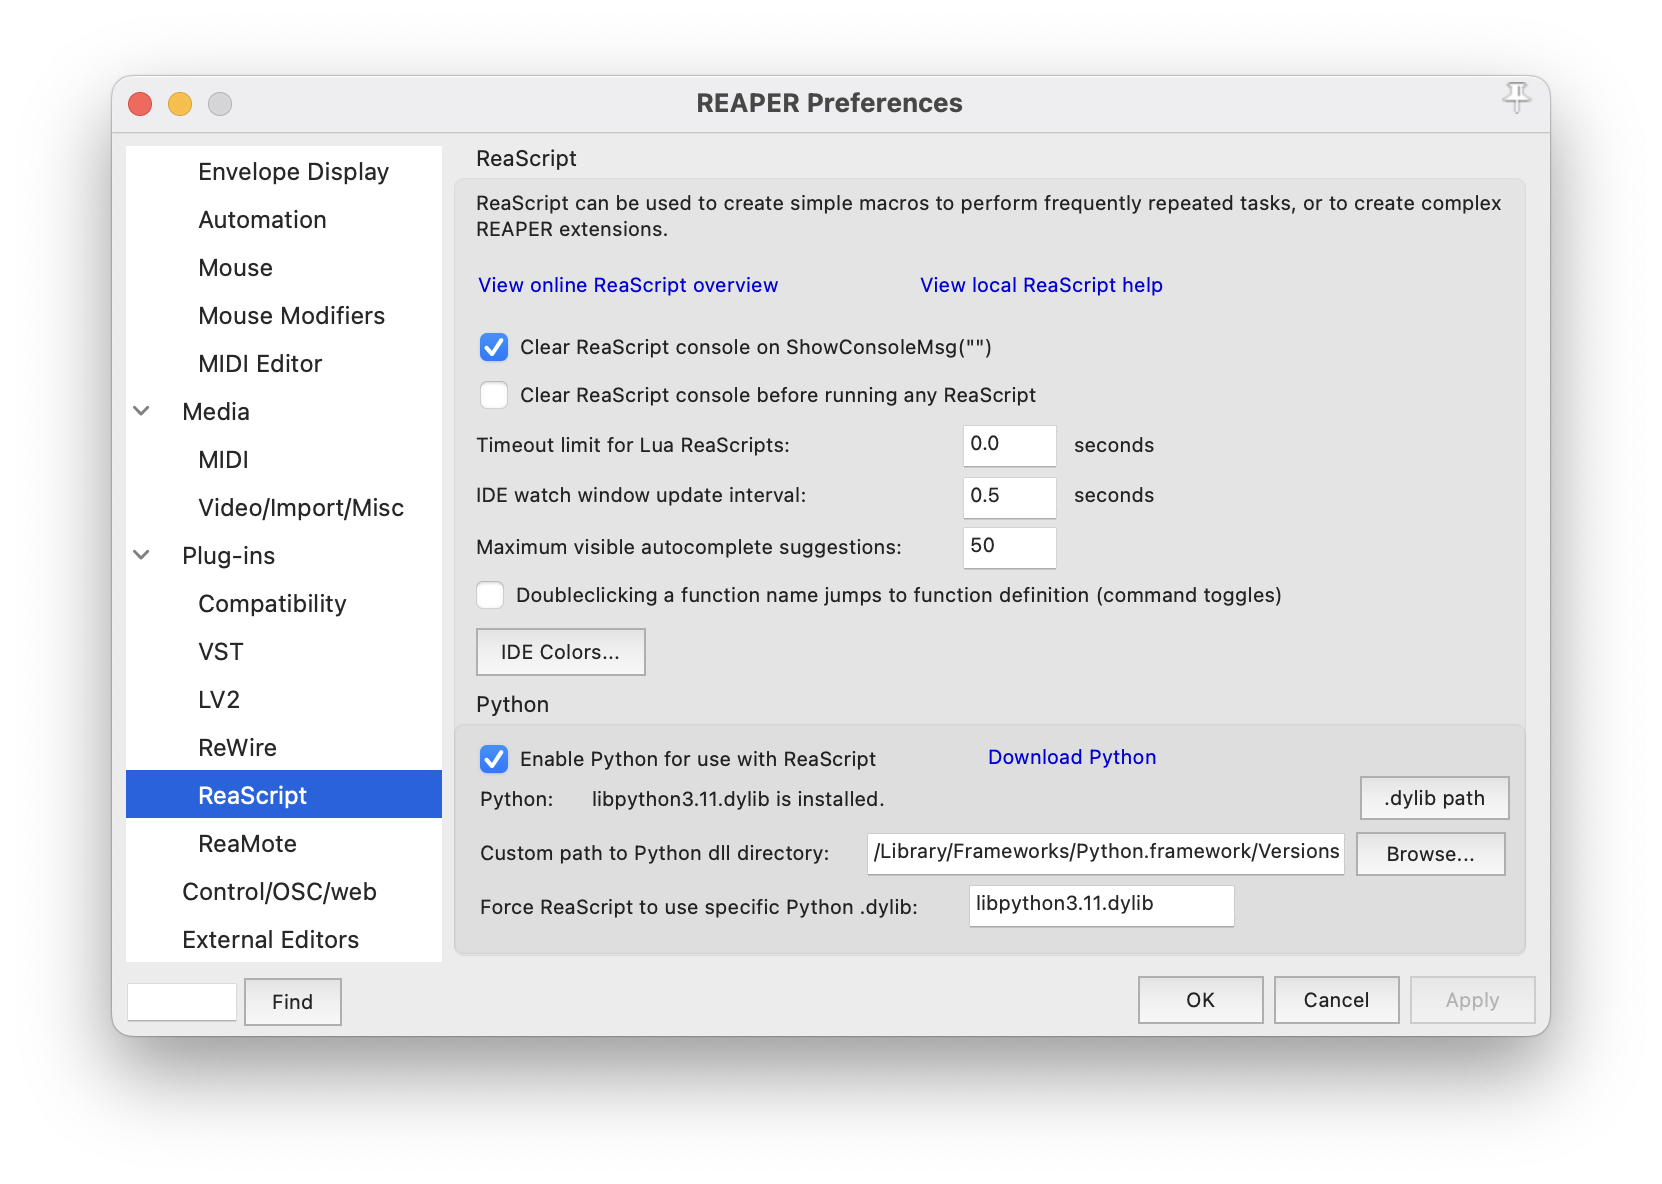

To install Reapy you can use:

`$ pip install python-reapy`

After that you need to have Reaper open and then run in a terminal:

`$ python -c "import reapy; reapy.configure_reaper()"`

Then restart Reaper.
Now reapy is ready to be used. 


## 2.2 Basic Interactions with Reaper
First import reapy:

In [ ]:
import reapy

We can open a existing Reaper Project with the function:

`reapy.core.reaper.reaper.open_project()`

Parameters:
- `filepath` 

optional Parameters:
- `in_new_tab`, Bool 
- `make_current_project`, Bool

It returns a project object.

In [ ]:
# path to reaper project folder:
reaper_project_folder = os.getcwd()+'/reaper_projects/'
#project name:
project_name = "scene_1.RPP"
# open project
reaper_project = reapy.core.reaper.reaper.open_project(reaper_project_folder + project_name)

Now we have `reaper_project` as our reaper Project.
We can use its methods and parameters to interact with Reaper.

Some Examples:

- Hit the Play-Button with:

In [ ]:
reaper_project.play()

- Hit the Stop-Button with:

In [ ]:
reaper_project.stop()

- Set cursor Position to Float value, in this case 0:

In [ ]:
reaper_project.cursor_position = 0

## 2.3 Accessing Tracks in Reaper

With `.tracks[i]`you can now access tracks and their parameters.
For example you could access FXs by adding `.fxs[i]`
and with `.params[i]`its parameters.
`i`doesnt have to be an integer it could also be a string.

To set the Bypass Option of the first FX of the first track you can use:

In [ ]:
reaper_project.tracks[0].fxs[0].params["Bypass"] = 1

In [ ]:
reaper_project.tracks[0].fxs[0].params["Bypass"] = 0

# 3 Open Sound Control - OSC

Open Sound Control is a networking protocol for connecting music / multimedia devices and computers.
A UDP client is used to send and receive messages.
A python package is conveniently availible and can be installed via pip: `pip install python-osc`

A OSC message usually consists of a string containing a command or a parameter that is to be changed and the values of the changes as int or float.

## TODO: how to configure reaper

## 3.1 Configuring Reaper
To use OSC to control Reaper functionality directly you need to configure Reaper first.
Under Reaper `Preferences > CONTROL/OSC/web` a new control surface needs to be added.
For our purposes the simple configurations shown be below does suffice.

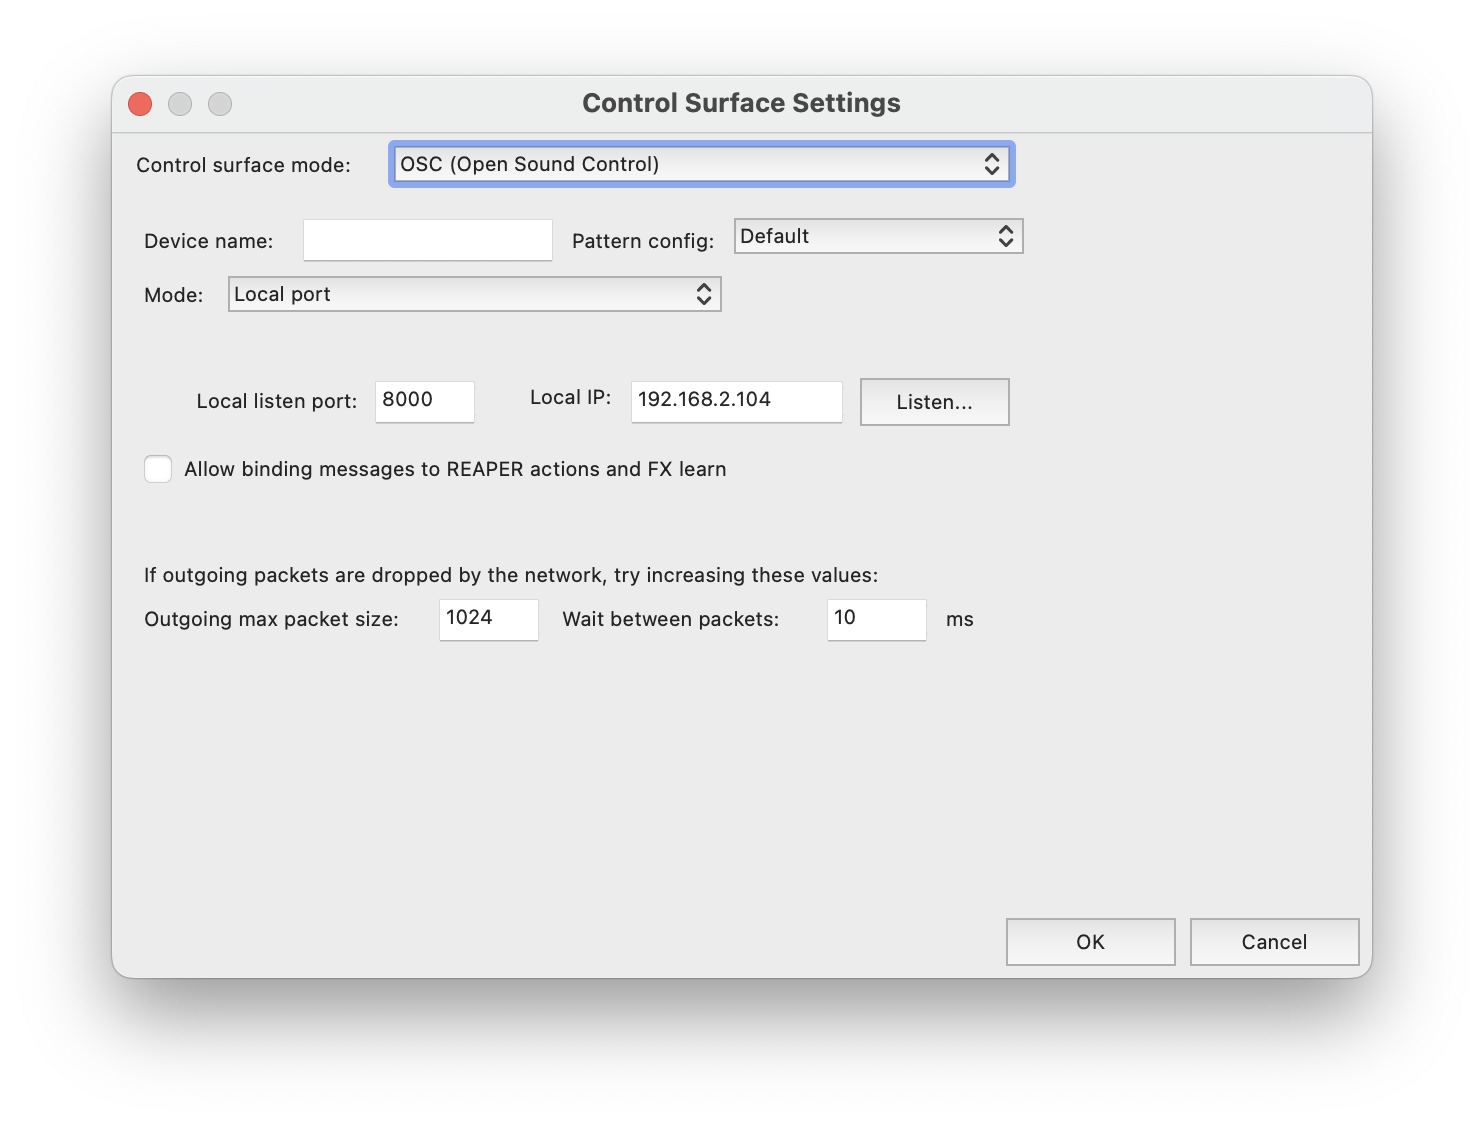

## 3.2 Setting up UDP-clients
First we need to import the `udp_client` from `pythonosc` and set up a simple client to send messages.
We need to set the IP and a matching OSC Port.
To send messages to both Reaper and the ABComparison Plugin, two seperate clients are needed.

In [ ]:
from pythonosc import udp_client

# The ip of the OSC server:
ip = "127.0.0.1" 

# OSC port of reaper:
reaper_port = 8000 

# OSC port of the Abcomparison plugin:
abc_switch_port = 9222 

# client for sending osc messages to reaper
reaper_client = udp_client.SimpleUDPClient(ip, reaper_port)  

# client for sending osc messages to ABComparison plugin
abc_switch_client = udp_client.SimpleUDPClient(ip, abc_switch_port) 

## 3.2 Basic Interactions with Reaper

Now we can send messages to Reaper to control some of its functions and parameters.

Some examples:

- Hit the Play-Button:

In [ ]:
message = "t/play"

value = 1

reaper_client.send_message(message, value)

- Hit the Stop-Button:

In [ ]:
message = "t/stop"

value = 1

reaper_client.send_message(message, value)

- Set the Output-Volume of a single Track:

In [ ]:
track_number = 2

message = "/track/"+str(track_number)+"/volume/db"

volume = -6

reaper_client.send_message(message, volume)

## 3.3 ABComparison Plugin 

The ABComparison Plugin is used to switch between inputs in this example.
We can decide how many options there are to switch between and how many channels each option has. 
Then we have to route the reaper tracks into the right channels on the track the plugin is in.
Pre compiled version as well as the source code can be found at: https://github.com/DanielRudrich/ABComparisonPlugin


To switch between options via OSC we need to send the message `"/switch"` with the option we want it to switch to as an int.

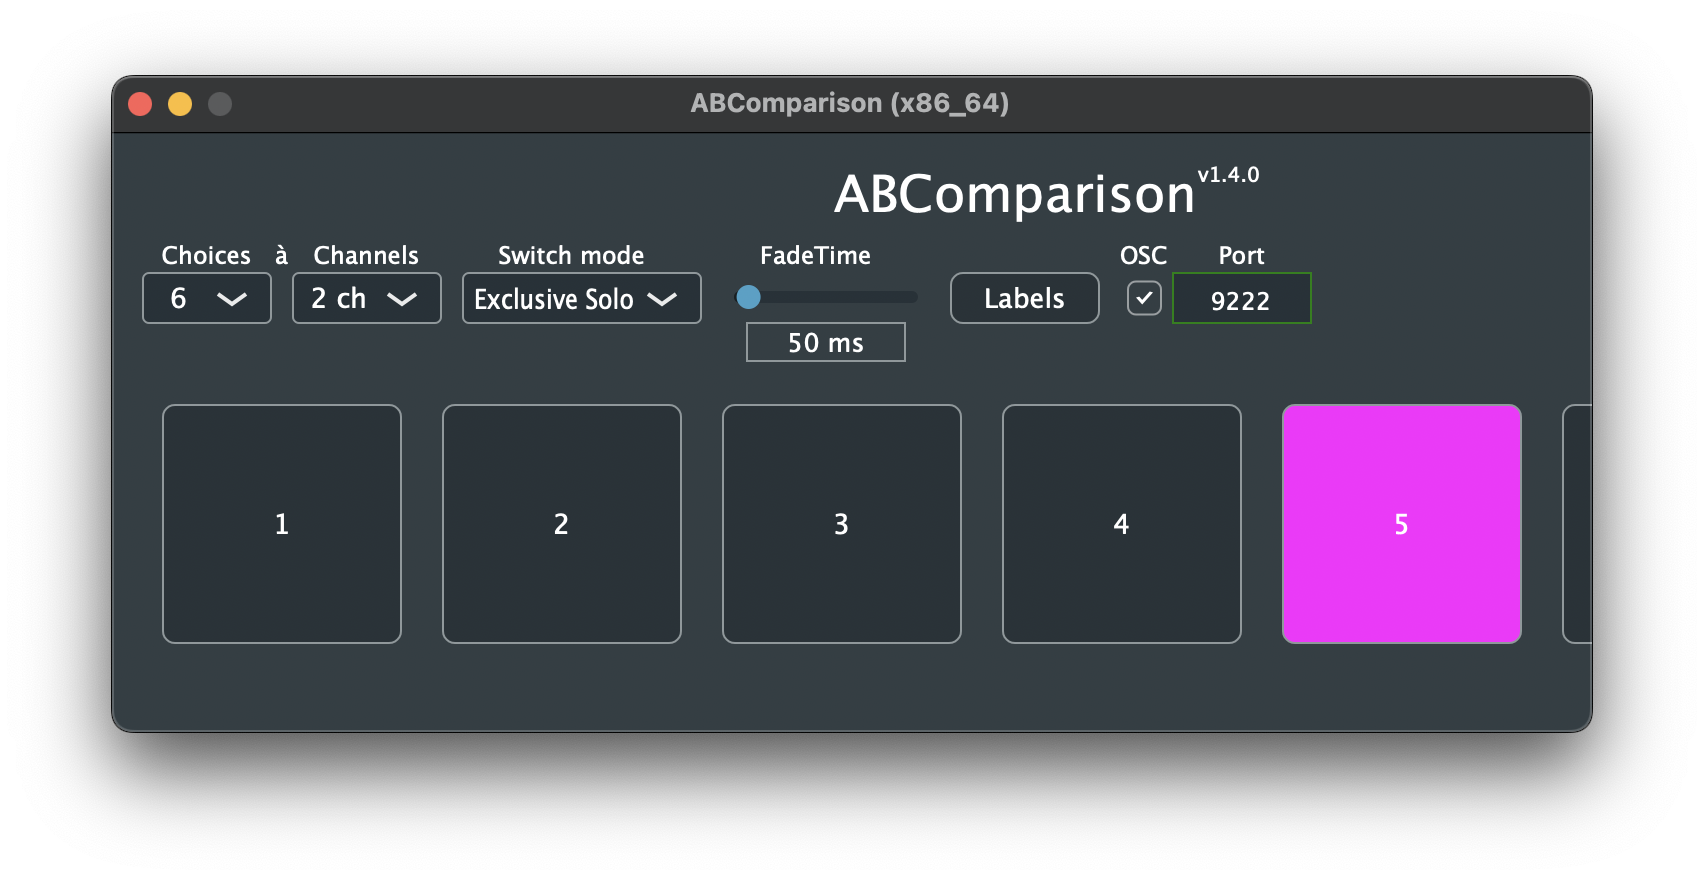



The image below shows the Reaper configuration for track 1 which the ABComparison plug-in is used on.

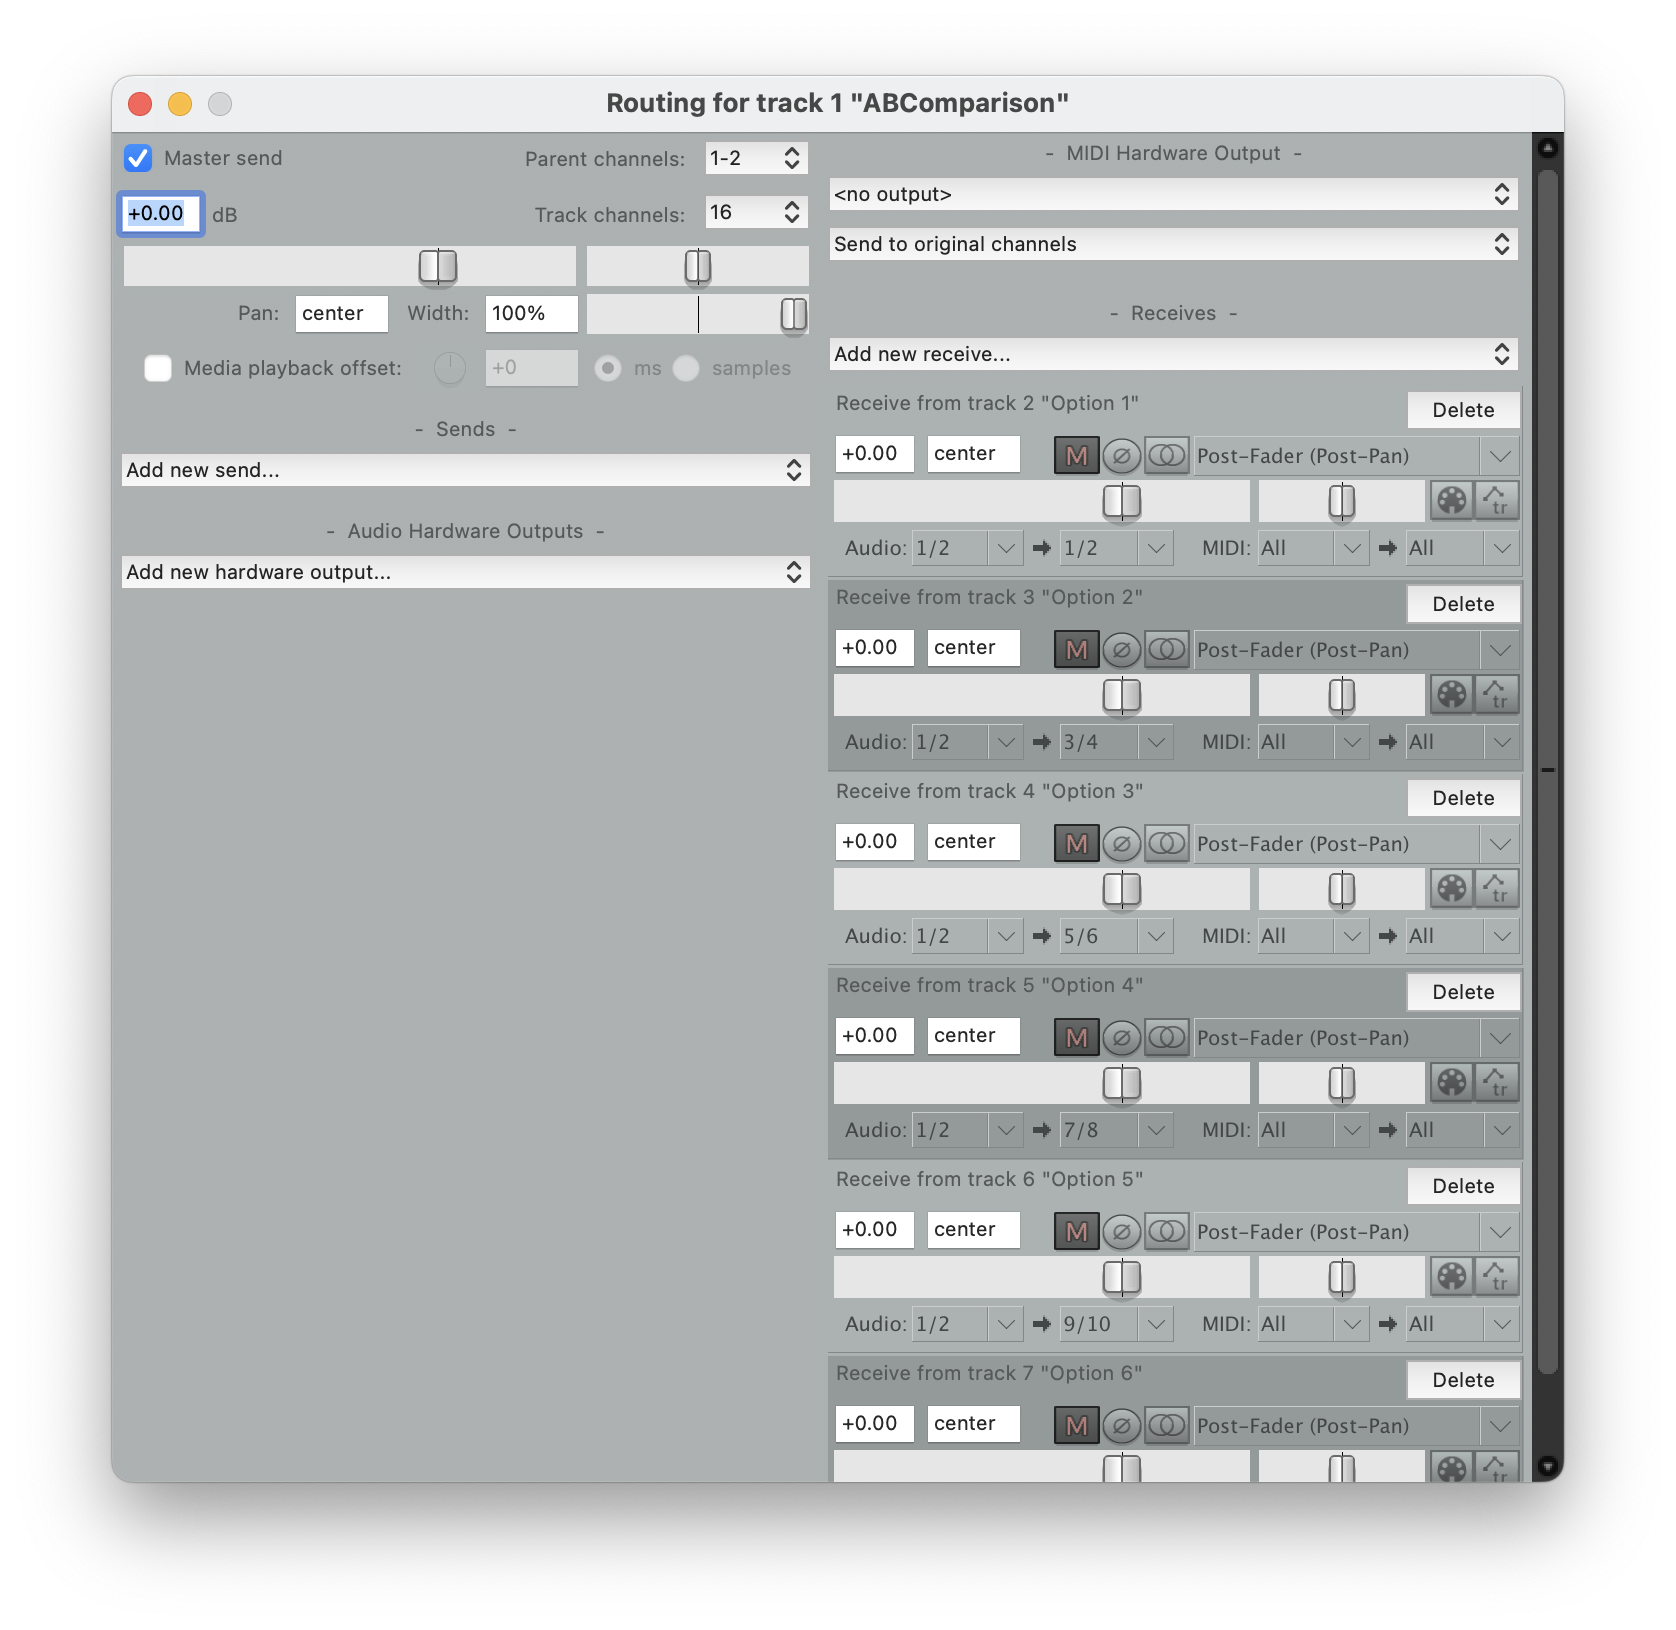

In [ ]:
message = "/switch"

value = 2

abc_switch_client.send_message(message, value)

# 4 Jupyter Widgets

A simple way to create interactive widgets in a notebook is the jupyter widgets or ipywidgets library. 
It can be installed via pip: 

`pip install ipywidgets`


The full documentationis availible at: https://ipywidgets.readthedocs.io/en/stable/

In [ ]:
# import jupyter widgets
import ipywidgets as widgets
# import layouts for widgets
from ipywidgets import Layout

## 4.1 Some simple Examples

A simple button can be created with `widgets.Button`.
We can control its appearance with the attributes `layout`and `style`.
The `layout` attribute expects a `Layout` Object with things like `width` and `height` as parameters.
The `style` attribute supports different styles for each widget class.
In the case of the `Button` its the `ButtonStyle`.
With it you can change the appearance of the button, eg. the color.

Lets create a button:

In [ ]:
button = widgets.Button(
                        description = "A Button",
                        layout = Layout(width = 'auto', height = 'auto'),
                        style = widgets.ButtonStyle(button_color = 'white'),
                        disabled = False)

display(button)

This button doesnt do anything on click yet.
First we need to define a function it should perform when clicked:

In [ ]:
def change_color(button):

    color = "%06x" % random.randint(0, 0xFFFFFF)
    button.style.button_color = '#'+color

Now we need to connect function to button. This is done by the buttons `on_click` method:

In [ ]:
button.on_click(change_color)

Other widgets like a `Slider` or `ToggleButtons` might not have the `on_click` method but the `observe` method instead.

The `ToggleButtons` widget can be used to toggle between states. The options parameter determines how many buttons will be created and what they are named and displayed as.
The widget has a `value` attribute that represents the state the widget is in. 
Lets create some Toggle Buttons that represent the Play, Stop and Pause actions.

In [ ]:
play_button = widgets.ToggleButtons(

    options = ['Play', 'Stop', 'Pause'],
    value = 'Stop',
    disabled = False,
    button_style = '', 
    tooltip = 'Description',
    icon = '' 
)

display(play_button)

Now we need a function to be called when the button state changes.
This function should be able to change the reaper play state through the Reapy API.

In [ ]:
def send_play_message(change):
    if play_button.value == 'Play':
        reaper_project.play()
    elif play_button.value == 'Stop':
        reaper_project.stop()
        reaper_project.cursor_position = 0
    elif play_button.value == 'Pause':
        reaper_project.pause()
    else: print("play_button error")

Then connect the function to the `play_button` through the `observe` method.

In [ ]:
play_button.observe(send_play_message, 'value')

Sliders work in a similar way. There current value can be obtained and set by the `value` attribute.
Changes can be observed and acted upon with the `observe` method.

## 4.2 Layout
To layout and display widgets together the `VBox` and `HBox`elements can be used.

In [ ]:
buttons_vertical = widgets.VBox([button,button])
display(buttons_vertical)

In [ ]:
buttons_horizontal = widgets.HBox([button,button])
display(buttons_horizontal)

In [ ]:
buttons_cubed = widgets.VBox([buttons_horizontal,buttons_horizontal])
display(buttons_cubed)

# 5 Building a complete GUI

The next steps give an overview of the functions and widgets needed to create a complete GUI including loading new scenes / reaper projects.

## 5.1 Functions to create GUI Elements

First some functions need to be defined, that create the GUI elements we need.

In [ ]:
def create_play_buttons():
    play_button = widgets.ToggleButtons(

        options = ['Play', 'Stop', 'Pause'],
        value = 'Stop',
        disabled = False,
        button_style = '', 
        tooltip = 'Description',
        icon = '' 
    )
    return play_button

In [ ]:
def create_switch_buttons(options = 5):
    option_list = []
    for i in range(options):
        option_list.append(str(i+1))
        
    switch_buttons = widgets.ToggleButtons(

        options=option_list,
        value = '1',
        disabled = False,
        button_style = '', # 'success', 'info', 'warning', 'danger' or ''
        tooltip = 'Description',
        icon = '', # (FontAwesome names without the `fa-` prefix)
        style = {"button_width": "70px"}
    )
    return switch_buttons

In [ ]:
def create_sliders(options = 5, min_value = 0, max_value = 100, step_value = 1):
    sliders = []
    if step_value%1 > 0:
        format_value = '.1f'
    else:
        format_value = 'd'
        
    for i in range(options):
    
        sliders.append(widgets.FloatSlider(
            value = max_value/2,
            min = min_value,
            max = max_value,
            step = step_value,
            description = '',
            disabled = False,
            continuous_update = True,
            orientation = 'vertical',
            readout = False,
            readout_format = format_value,
            layout = Layout(width = '10px',height = '290px',align_self='center'),
            style = widgets.SliderStyle(handle_color = 'blue')
            ))
    return sliders

In [ ]:
def create_next_button():
    next_button = widgets.Button(
        
        description = 'next Scene',
        disabled = False,
        button_style = '', 
        tooltip = 'Save Ratings and load next Scene',
        icon = ''
    )
    return next_button

## 5.2 Functions to be called from widget interaction

We need a function to send OSC messages to the ABC-Plugin.

In [ ]:
def send_switch_message(change):
    abc_switch_client.send_message("/switch", int(switch_buttons.value)-1)

Another function refreshes the GUI state on a scene switch or when first loading the GUI. This is necessary because the Plugin can be set to a wrong where nothing is active if the same option is switched to twice in a row. To prevent this the function switches through all options.
It also resets all slider values and sets the stops playback.

In [ ]:
def refresh():
    for i in range(options):
        sliders[i].value = sliders[i].max/2
        switch_buttons.value = str(i+1)
        time.sleep(0.1)
    switch_buttons.value = '1'
    play_button.value = 'Stop'
    reaper_project.stop()   

Save functions are needed to create a json file and append the ratings on a scene change.
Because the JSON standard doesnt support appending out of the box we need three separate functions to achieve this.

- The first function creates the .json file and adds some initial data to it. In this case the name of the subject and the time are added. The data needs to be prefixed by a left brace to start a JSON object.

In [ ]:
def create_file():
    
    file_path = save_path+save_name+".json"
    
    data = {
        "name":name,
        "time":time.strftime("%d.%m.%Y : %H:%M:%S"),

    }
    with open(save_path+save_name+".json", 'w') as file:
        file.write("{\n\"test_data\":")
        json.dump(data, file, indent=2)

- The following functions appends the ratings and additional data to the previously created file.

In [ ]:
def write_to_file(ratings):
    data = {
        "time":time.strftime("%d.%m.%Y : %H:%M:%S"),
        "time_abs":time.time(),
        "loaded_project":reaper_project.name,
        "ratings":ratings
    }
    with open(save_path+save_name+".json", 'a') as file:
        current_scene = str(scene_counter)
        file.write(",\n\"scene_"+current_scene+"\":")
        json.dump(data, file, indent=2)

- The last function works like the write_to_file function above but adds the right brace at the end to close the JSON object.

In [ ]:
def finish_file(ratings):
    data = {
        "time":time.strftime("%d.%m.%Y : %H:%M:%S"),
        "time_abs":time.time(),
        "loaded_project":reaper_project.name,
        "ratings":ratings
    }
    with open(save_path+save_name+".json", 'a') as file:
        current_scene = str(scene_counter)
        file.write(",\n\"scene_"+current_scene+"\":")
        json.dump(data, file, indent=2)
        file.write("\n}")

Now all we need is a function to switch scenes.
It disables the GUI, gathers the slider ratings, saves and closes the current project and then opens the next one. In the end the `refresh` function is used and the GUI elements are enabled again.

In [ ]:
def next_scene(change):
    global scene_counter
    global reaper_project
    global was_changed_flag

    # empty info button
    info_button.description = " "
        
    # stop playback
    reaper_project.stop()

    # disable GUI
    play_button.disabled = True
    switch_buttons.disabled = True
    next_button.disabled = True
        
    ratings = []
   
    for i in range(options):
        ratings.append(sliders[i].value)
   
    if scene_counter < scene_number-1:
        
        loading_scene_button.description = 'loading...'
        
        scene_counter = scene_counter+1
        
        write_to_file(ratings)
        
                     
        # save current project to avoid prompt:
        reaper_project.save()
        # close old project
        reaper_project.close()
        
        # path to new project
        reaper_project_path = reaper_project_folder + 'scene_' + str(scene_counter+1) + '.RPP'
        # load project (from copy)
        reaper_project = reapy.core.reaper.reaper.open_project(reaper_project_path, in_new_tab=False)
            
        # wait for specified time:
        for timer in range(wait_time):
            loading_scene_button.description = 'loading... '+str(wait_time-timer)
            time.sleep(1)
        
        # refresh gui / reset sliders:
        refresh() 
    
        # update loading info:
        scene_counter_button.description = 'Scene: '+str(scene_counter+1)+'/'+str(scene_number)
        loading_scene_button.description = 'done loading'
        if scene_counter == scene_number-1:
            next_button.description = 'Save Ratings'
                
        # enable GUI
        play_button.disabled = False
        switch_buttons.disabled = False
        next_button.disabled = False

    elif scene_counter == scene_number-1:
        
        scene_counter = scene_counter+1
        
        finish_file(ratings)
          
        # save current project to avoid prompt:
        reaper_project.save()
        # close old project
        reaper_project.close()
        
        # update saving info:
        next_button.description = 'Saved!'
        info_button.description = "All done :-) Thanks a lot for participating in this experiment."
        
    else:
            print("scene_counter error")

## 5.3 Set Variables 
Now some variables for the number of options and scenes, the path to the reaper projects and other options.

In [ ]:
# the name or ID of the participant:
name = 'ID_01'

# the name the results file will have:
save_name = 'save_ID_01'

# the folder to store the json files with results in
save_path = os.getcwd()+'/'

# number of options per scene:
options = 6 

# number of scenes per test:
scene_number = 2 

# path to reaper project folder:
reaper_project_folder = os.getcwd()+'/reaper_projects/'

# option for scales: 'on_tick', 'between_ticks'
scale_type = 'between_ticks' 

# wait time after a new scene is loaded:
wait_time = 3

# generating working variables, used as global in some functions!
scene_counter = 0

ratings = []

## 5.4 Create GUI Elements

Some buttons need to be created. They dont get a description, their `disabled` parameter is set to `True`.
They dont get a function attached.

In [ ]:
# empty buttons
empty_button=widgets.Button(
                    layout=Layout(width='auto', height='auto'),
                    style=widgets.ButtonStyle(button_color='white'),
                    disabled=True)
big_empty_button=widgets.Button(
                    layout=Layout(width='auto', height='400px'),
                    style=widgets.ButtonStyle(button_color='white'),
                    disabled=True)
spacer_button_scene=widgets.Button(
                    layout=Layout(width=str(options*35)+'px', height='auto'),
                    style=widgets.ButtonStyle(button_color='white'),
                    disabled=True)
spacer_button_front=widgets.Button(layout=Layout(width='83px', height='auto'),
                    style=widgets.ButtonStyle(button_color='white'),
                    disabled=True)

The next three buttons that will be created are used to display information to the user. Their `disabled` parameter is also set to `True`. Their descriptions are changed when the corresponding information changes.

In [ ]:
# button that displays scene count 
scene_counter_button=widgets.Button(
                    description='Scene: '+str(scene_counter+1)+'/'+str(scene_number),
                    layout=Layout(width='auto', height='auto'),
                    style=widgets.ButtonStyle(button_color='white'),
                    disabled=True)

In [ ]:
# button that displays loading message and wait time
loading_scene_button = widgets.Button(
                    description = '',
                    layout = Layout(width = 'auto', height = 'auto'),
                    style = widgets.ButtonStyle(button_color = 'white'),
                    disabled = True)

In [ ]:
# button that displays info messages
info_button=widgets.Button(
                    description = " ",
                    layout=Layout(width='auto', height='auto'),
                    style=widgets.ButtonStyle(button_color='white',font_size="18px"),
                    disabled=True)

Some `.png` files need to be loaded with scales for the sliders.

In [ ]:
# load png images for scales
if scale_type == 'on_tick':
    scale_file = open("scale_on_tick.png", "rb")
    scale_ticks_file = open("scale_on_tick_ticks.png", "rb")
elif scale_type == 'between_ticks':
    scale_file = open("scale_between_ticks.png", "rb")
    scale_ticks_file = open("scale_between_ticks_ticks.png", "rb")
else:
    print('set correct scale_type')

Now these files need to be loaded into an `Image` widget. They will later be organized in a layout with all the other buttons.

In [ ]:
# display scale image
scale_image = scale_file.read()
scale=widgets.Image(
    value=scale_image,
    format='png',
    #width='120px',
    height='250px',
    layout=Layout(height='300px',align_self='center')
)

In [ ]:
# display ticks images between sliders
scale_ticks = scale_ticks_file.read()
ticks=widgets.Image(
    value=scale_ticks,
    format='png',
    width="56px",
    height="250px",
    layout=Layout(height='300px',align_self='center')
)

In [ ]:
# display ticks image at the and of sliders
ticks_half=widgets.Image(
    value=scale_ticks,
    format='png',
    width="30px",
    height="250px",
    layout=Layout(height='300px',align_self='center')
)

Now we can create all buttons and connect them to their functions.

In [ ]:
play_button = create_play_buttons()
play_button.observe(send_play_message, 'value')

switch_buttons=create_switch_buttons(options)
switch_buttons.observe(send_switch_message, 'value')

next_button = create_next_button()
next_button.on_click(next_scene)

sliders = create_sliders(options)

The next step is to bundle all elements that share a horizontal space together in `Hbox` containers.

In [ ]:
# create horizontal boxes
scene_box = widgets.HBox([spacer_button_front,next_button,scene_counter_button,spacer_button_scene,loading_scene_button])
play_button_box = widgets.HBox([spacer_button_front,play_button])
switch_buttons_box = widgets.HBox([spacer_button_front,switch_buttons])

addlist = [scale]
for i in range(options-1):
    addlist = addlist + [sliders[i]] + [ticks]
addlist = addlist + [sliders[options-1]]+ [ticks_half]
slider_box = widgets.HBox(addlist)

Now we we need to bring all these horizontal boxes together in one `VBox` and thus create the final GUI.

In [ ]:
# create vertical box for full gui
gui_full = widgets.VBox([big_empty_button,play_button_box,empty_button,switch_buttons_box,slider_box,scene_box,info_button,big_empty_button])
box_layout = Layout(overflow='scroll hidden',
                    #border='3px solid black',
                    width='auto',
                    height='',
                    flex_flow='row',
                    display='flex')
gui_box = widgets.Box(children = [gui_full], layout = box_layout)

Before displaying the GUI the `refresh` function should be used. We also need to create the file the ratings will be stored in.

In [ ]:
refresh()

create_file()

Finally we can display the full GUI.

In [ ]:
display(gui_box)